# Day4 CNN with details

## Overview


Convolutional Neural Networks (CNNs) are a type of deep learning model specifically designed for recognizing patterns and spatial hierarchies in data. While traditionally used in image processing, CNNs are also powerful for tasks involving sequential data, such as DNA sequences, because of their ability to detect local patterns.



![](images/cnn2.png)
https://nafizshahriar.medium.com/what-is-convolutional-neural-network-cnn-deep-learning-b3921bdd82d5

## Dimension (3D, 4D)

- ndarray (numpy)
- tensor (torch)
  

![alt text](images/dim3.png)

#### Image data 
- ndarray (numpy): Data is stored as (height, width, channels) (e.g., grayscale or RGB)

- tensor (PyTorch): Data is stored as (batch, channels, height, width) 

In [54]:
import numpy as np
import torch

display(np.ones((2, 3, 4)))
display(torch.ones((2, 3, 4)))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

![](images/dim5.png)

#### Tensor

In [55]:
import torch

# Scalar (0D tensor)
scalar = torch.tensor(5)
print("Scalar:", scalar)

# Vector (1D tensor)
vector = torch.tensor([1, 2, 3])
print("Vector:", vector)

# Matrix (2D tensor)
matrix = torch.tensor([[1, 2], [3, 4]])
print("Matrix:\n", matrix)

# 3D Tensor (e.g., RGB image)
tensor_3d = torch.rand(3, 4, 3)  # Random 3D tensor (height=3, width=4, channels=3)
print("3D Tensor (RGB image shape):", tensor_3d.shape)
print(tensor_3d)

# 4D Tensor (Batch of images)
tensor_4d = torch.rand(2, 3, 4, 3)  # Batch size=2
print("4D Tensor (Batch of RGB images shape):", tensor_4d.shape)


Scalar: tensor(5)
Vector: tensor([1, 2, 3])
Matrix:
 tensor([[1, 2],
        [3, 4]])
3D Tensor (RGB image shape): torch.Size([3, 4, 3])
tensor([[[0.9165, 0.6617, 0.1589],
         [0.4045, 0.3932, 0.8812],
         [0.8592, 0.8760, 0.5807],
         [0.6333, 0.9934, 0.5808]],

        [[0.7836, 0.8921, 0.0630],
         [0.9065, 0.6955, 0.4772],
         [0.8679, 0.4292, 0.9987],
         [0.7440, 0.8195, 0.5946]],

        [[0.7467, 0.4266, 0.1780],
         [0.2938, 0.6778, 0.0691],
         [0.3945, 0.7627, 0.3576],
         [0.0728, 0.8352, 0.5470]]])
4D Tensor (Batch of RGB images shape): torch.Size([2, 3, 4, 3])


#### Example

Image Size: (500, 500)
Image Mode: RGB


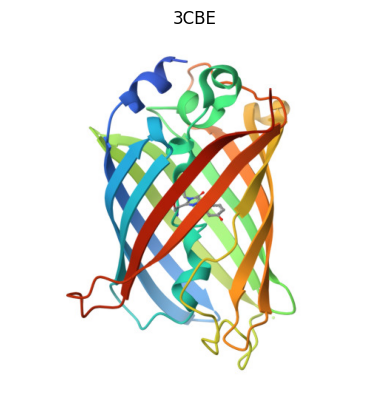

In [56]:
from PIL import Image  # For reading and processing images
import matplotlib.pyplot as plt
import numpy as np
import torch

# Load the image
image_path = 'images/3cbe_model-1.jpeg'  # Replace with your image path
image = Image.open(image_path)

# Show basic properties
print("Image Size:", image.size)  # (width, height)
print("Image Mode:", image.mode)  # e.g., "RGB"

# Display the image
plt.imshow(image)
plt.title("3CBE")
plt.axis("off")
plt.show()



#### Conversion

In [16]:
# Convert image to NumPy array
image_np = np.array(image)
print("Image Shape (NumPy):", image_np.shape)  # e.g., (height, width, channels)

Image Shape (NumPy): (500, 500, 3)


In [17]:
# Convert NumPy array to PyTorch tensor
image_tensor = torch.from_numpy(image_np).permute(2, 0, 1)  # Change to (channels, height, width)
image_tensor = image_tensor.float() / 255.0  # Normalize pixel values to [0, 1]
print("Image Shape (PyTorch Tensor):", image_tensor.shape)  # e.g., (3, height, width)

# Add batch dimension for model input
image_tensor = image_tensor.unsqueeze(0)  # Shape: (1, channels, height, width)
print("Image Shape with Batch Dimension:", image_tensor.shape)


Image Shape (PyTorch Tensor): torch.Size([3, 500, 500])
Image Shape with Batch Dimension: torch.Size([1, 3, 500, 500])


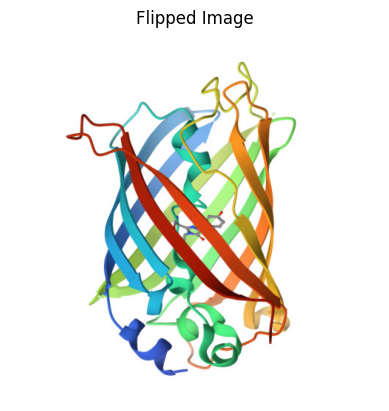

In [45]:
# Flip the image horizontally
flipped_tensor = image_tensor.flip(2)  # Flip along the last dimension (width)

# Convert back to NumPy for visualization
flipped_image = flipped_tensor.squeeze(0).permute(1, 2, 0).numpy()

# Display the flipped image
plt.imshow(flipped_image)
plt.title("Flipped Image")
plt.axis("off")
plt.show()


## Dot products

- A fundamental operation in linear algebra that combines two vectors to produce a single scalar value.
- It measures how aligned two vectors are and has applications in geometry, physics, and machine learning.

- For two vectors $ \mathbf{a} = [a_1, a_2, \dots, a_n] $ and $ \mathbf{b} = [b_1, b_2, \dots, b_n] $ in $n$-dimensional space, the dot product is defined as:

$$
\mathbf{a} \cdot \mathbf{b} = a_1b_1 + a_2b_2 + \dots + a_nb_n = \sum_{i=1}^n a_i b_i
$$


- Geometric Interpretation:
   - The dot product measures the projection of one vector onto another.
   - It is related to the angle $ \theta $ between the vectors:
   $$
     \mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos\theta
   $$
   - $ \|\mathbf{a}\| $ and $ \|\mathbf{b}\| $ are the magnitudes (lengths) of $ \mathbf{a} $ and $ \mathbf{b} $.

- Orthogonality:
   - If $ \mathbf{a} \cdot \mathbf{b} = 0 $, the vectors are perpendicular (orthogonal).

- Significance of Value:
   - Positive dot product: Vectors point in roughly the same direction.
   - Zero dot product: Vectors are orthogonal (90° apart).
   - Negative dot product: Vectors point in opposite directions.

![](images/dot3.png)



#### Example 

- Simple Numerical Example

Let $ \mathbf{a} = [1, 2, 3] $ and $ \mathbf{b} = [4, 5, 6] $. The dot product is:
$$
\mathbf{a} \cdot \mathbf{b} = (1)(4) + (2)(5) + (3)(6) = 4 + 10 + 18 = 32
$$

-  Geometric Example
If $ \|\mathbf{a}\| = 5 $, $ \|\mathbf{b}\| = 3 $, and the angle between them is $ \theta = 60^\circ $, the dot product is:
$$
\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos\theta = 5 \cdot 3 \cdot \cos(60^\circ) = 15 \cdot 0.5 = 7.5
$$

- Applications in Machine Learning

   - Similarity Measurement: Dot product measures similarity between vectors, such as in cosine similarity.
   - Convolutions: Extract features by computing dot products between filters and input regions.
   - Attention Mechanisms: Uses dot products to calculate importance weights between query and key vectors.

## Dataset and Dataloader


#### Dataset
- A class that represents your data, providing a way to access samples and their corresponding labels.
- We can define a custom dataset by subclassing `torch.utils.data.Dataset` and overriding:
  1. `__len__`: Returns the total number of samples.
  2. `__getitem__`: Retrieves a single sample (data and label) by index.


In [74]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class SimpleDataset(Dataset):
    def __init__(self, size):
        # Generate random x values
        self.x = np.random.rand(size, 1) * 10  # Shape: (size, 1)
        self.y = 2 * self.x + 3  # Generate labels (y = 2x + 3)

    def __len__(self):
        # Total number of samples
        return len(self.x)

    def __getitem__(self, idx):
        # Retrieve the sample at index `idx`
        sample = torch.tensor(self.x[idx], dtype=torch.float32)
        label = torch.tensor(self.y[idx], dtype=torch.float32)
        return sample, label

# Create an instance of the dataset
dataset = SimpleDataset(size=100)

# Access the first sample
sample, label = dataset[0]
print("Sample:", sample, "Label:", label)

# Check the length of the dataset
print("Number of samples in dataset:", len(dataset))



Sample: tensor([0.6128]) Label: tensor([4.2255])
Number of samples in dataset: 100



#### Dataloader


- It provides "Efficient batching of data", "Shuffling of data to avoid bias", and "Parallel data loading using multiple workers."
- Batch Processing: 
   - Instead of processing one sample at a time, `DataLoader` automatically groups samples into batches.
   - This improves computational efficiency, especially with GPUs.

- Shuffling:
   - Shuffles the data during training to reduce bias.

- Parallel Loading:
   - Loads data in parallel using multiple workers (`num_workers` parameter).

In [75]:
# Create a DataLoader to handle batching
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Iterate through the DataLoader
for batch_idx, (batch_samples, batch_labels) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}")
    print("Samples:\n", batch_samples)
    print("Labels:\n", batch_labels)
    break  # Show only the first batch

Batch 1
Samples:
 tensor([[9.4416],
        [7.3267],
        [0.8215],
        [3.6725],
        [3.7980],
        [3.2378],
        [9.5629],
        [9.5563],
        [6.4680],
        [4.2153]])
Labels:
 tensor([[21.8831],
        [17.6535],
        [ 4.6430],
        [10.3449],
        [10.5959],
        [ 9.4756],
        [22.1257],
        [22.1126],
        [15.9360],
        [11.4305]])


#### Sequence example

In [114]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Data generation
seq_length = 20
num_sample = 1000

# Motif CCGGAA PWM
motif_pwm = np.array([[10.41, 22.86, 1.92, 1.55, 98.60, 86.66],
                      [68.20, 65.25, 0.50, 0.35, 0.25, 2.57],
                      [17.27, 8.30, 94.77, 97.32, 0.87, 0.00],
                      [4.13, 3.59, 2.81, 0.78, 0.28, 10.77]])
pwm = np.hstack([np.ones((4, 7)), motif_pwm, np.ones((4, 7))])

# Generate positive samples
pos = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_sample,
                                  p=pwm[:, i] / sum(pwm[:, i])) for i in range(seq_length)]).transpose()

# Generate negative samples
neg = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_sample,
                                  p=np.array([1, 1, 1, 1]) / 4) for i in range(seq_length)]).transpose()

# Combine data and create labels
data = np.vstack([pos, neg])
labels = np.array([1] * num_sample + [0] * num_sample)  # Positive: 1, Negative: 0

print(data.shape, labels.shape)


(2000, 20) (2000,)


In [113]:
class SequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        """
        Initialize the dataset.
        Args:
        - sequences: A NumPy array of shape (num_samples, seq_length) containing DNA sequences.
        - labels: A NumPy array of shape (num_samples,) containing labels (0 or 1).
        """
        self.sequences = sequences
        self.labels = labels
        self.nucleotide_to_idx = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Convert sequence to one-hot encoding
        sequence = self.sequences[idx]
        one_hot = np.zeros((4, len(sequence)), dtype=np.float32)
        for i, nucleotide in enumerate(sequence):
            one_hot[self.nucleotide_to_idx[nucleotide], i] = 1.0

        # Convert to PyTorch tensor
        one_hot_tensor = torch.tensor(one_hot, dtype=torch.float32)
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.float32)

        return one_hot_tensor, label_tensor

# Create the dataset
dataset = SequenceDataset(data, labels)

# Create the DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check a batch of data
for batch_idx, (sequences, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}")
    print("Sequences Shape:", sequences.shape)  # Shape: (batch_size, 4, seq_length)
    print("Labels Shape:", labels.shape)        # Shape: (batch_size,)
    print("First Sequence (One-Hot):\n", sequences[0])
    print("First Label:", labels[0])
    break  # Show only the first batch


Batch 1
Sequences Shape: torch.Size([32, 4, 20])
Labels Shape: torch.Size([32])
First Sequence (One-Hot):
 tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
         0., 0.],
        [1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.]])
First Label: tensor(1.)


## Convolutional Layers
   - Extract local patterns (features) from the input data (e.g., motifs in DNA sequences, image patterns).
   - A small sliding window (filter or kernel) moves across the data.
   - The filter computes a dot product between its weights and the input it covers, producing a feature map.

![](images/conv2.png)

#### Kernel (Filter)
- A kernel (also called a filter) is a small, learnable matrix used in the convolution operation.
- Kernels slide over the input data to detect patterns, such as edges in images or motifs in DNA sequences.
- The values inside the kernel are the parameters that the model learns during training.

- For a 2D convolution:
$$
  \text{Kernel} =
  \begin{bmatrix}
  1 & 0 & -1 \\
  1 & 0 & -1 \\
  1 & 0 & -1
  \end{bmatrix}
$$

- For a 1D convolution:
$$
  \text{Kernel} = 
  \begin{bmatrix}
  1 & 0 & -1
  \end{bmatrix}
$$

- In the case of DNA, a kernel for 1D convolution that detects **"ATG"**:
  $$
  \text{Kernel} =
  \begin{bmatrix}
  1 & 0 & 0 \\
  0 & 0 & 0 \\
  0 & 0 & 1 \\
  0 & 1 & 0
  \end{bmatrix}
  $$

- Consider the sequence: **"ATGCGTTG"**.

- One-hot encoding of the sequence 4 by 8 matrix:
  $$
  \text{Input} =
  \begin{bmatrix}
  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\  % A
  0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\  % C
  0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 \\  % G
  0 & 0 & 1 & 0 & 0 & 1 & 1 & 0    % T
  \end{bmatrix}
  $$


#### Stride and padding

- Stride = 1: The kernel moves one position at a time. This results in a highly overlapping convolution operation
- Stride > 1: The kernel skips positions while sliding, reducing the spatial dimensions of the feature map. This makes the computation faster but may lose some spatial detail.

For a 1D convolution, the output size is calculated as:
$$
\text{Output Length} = \left\lfloor \frac{\text{Input Length} - \text{Kernel Size} + 2 \times \text{Padding}}{\text{Stride}} \right\rfloor + 1
$$

For a 2D convolution, the output size for height and width is:
$$
\text{Output Height} = \left\lfloor \frac{\text{Input Height} - \text{Kernel Height} + 2 \times \text{Padding}}{\text{Stride}} \right\rfloor + 1
$$

$$
\text{Output Width} = \left\lfloor \frac{\text{Input Width} - \text{Kernel Width} + 2 \times \text{Padding}}{\text{Stride}} \right\rfloor + 1
$$

In [45]:
import torch
import torch.nn as nn

# Define a 1D convolutional layer
conv1d = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1)

# Input tensor (batch_size=1, channels=1, seq_length=10)
input_tensor = torch.randn(1, 4, 10)

# Apply convolution
output = conv1d(input_tensor)
print("Input Shape:", input_tensor.shape)  # (1, 4, 10)
print("Output Shape:", output.shape)       # (1, 8, 10) 


Input Shape: torch.Size([1, 4, 10])
Output Shape: torch.Size([1, 8, 10])


In [46]:
import torch
import torch.nn as nn

# Define a 1D convolutional layer
conv1d = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=3, stride=3, padding=1)

# Input tensor (batch_size=1, channels=1, seq_length=10)
input_tensor = torch.randn(1, 4, 10)

# Apply convolution
output = conv1d(input_tensor)
print("Input Shape:", input_tensor.shape)  # (1, 1, 10)
print("Output Shape:", output.shape)       # (1, 1, 4) 


Input Shape: torch.Size([1, 4, 10])
Output Shape: torch.Size([1, 8, 4])


- What if padding = 0?
- What is the meaning of out_channels?

#### numpy code for the motif example

In [50]:
import numpy as np

np.random.seed(0)
def conv1d_numpy(input_data, kernel):
    """
    Perform 1D convolution for one-hot encoded DNA sequence.
    Args:
    - input_data: NumPy array of shape (4, seq_length) representing one-hot encoded DNA.
    - kernel: NumPy array of shape (4, kernel_size) representing the convolution filter.
    Returns:
    - feature_map: NumPy array of the convolved output.
    """
    num_channels, seq_length = input_data.shape
    _, kernel_size = kernel.shape
    output_length = seq_length - kernel_size + 1

    # Initialize the feature map
    feature_map = np.zeros(output_length)

    # Perform convolution (dot product for each sliding window)
    for i in range(output_length):
        window = input_data[:, i:i+kernel_size]  # Extract sliding window
        # out = np.multiply(window, kernel)
        # feature_map[i] = np.sum(out)
        feature_map[i] = np.sum(window * kernel) # dot product

    return feature_map


sequence, label = dataset[0]
sequence_np = sequence.numpy()

conv_kernel = np.random.rand(4, 5)
conv_kernel

feature_map_np = conv1d_numpy(sequence_np, conv_kernel)
print("Feature Map (NumPy):", feature_map_np)
print("Feature Map Shape (NumPy):", feature_map_np.shape)

Feature Map (NumPy): [2.20269505 1.83470684 3.41871594 3.17915171 3.3165857  3.15578407
 2.97188702 3.00077732 2.71137158 3.33827867 2.95887059 3.40566087
 2.48418074 2.8549015  3.95476016 3.13685259]
Feature Map Shape (NumPy): (16,)


![](images/slidingwindow.png)

- pytorch code

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DNA_CNN(nn.Module):
    def __init__(self):
        super(DNA_CNN, self).__init__()
        # Convolution Layer: 4 input channels (A, C, G, T), 
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=1, kernel_size=5, stride=1, padding=0)

    def forward(self, x):
        x = self.conv1(x)  # Apply convolution
        return x

# Instantiate the model
model = DNA_CNN()
print(model)

sequence, label = dataset[0]
out = model(sequence)
print("Output Shape:", out.shape)
print(out)
noact_out = out


DNA_CNN(
  (conv1): Conv1d(4, 1, kernel_size=(5,), stride=(1,))
)
Output Shape: torch.Size([1, 16])
tensor([[ 0.1340, -0.1981,  0.1160,  0.1986,  0.4438,  0.5583,  0.5739,  0.3242,
         -0.0027, -0.2718,  0.2756,  0.4053,  0.2138,  0.2551,  0.4002,  0.4910]],
       grad_fn=<SqueezeBackward1>)



## Activation Functions
   - Introduce non-linearity into the model.
   - Common Function: ReLU (Rectified Linear Unit) is often used because it accelerates training and reduces the chance of vanishing gradients.


- Types of activation functions
    - ReLU : Default choice for hidden layers in CNNs.                                       
    - Sigmoid  : Final output layer for binary classification.                                  
    - Tanh  : Hidden layers when symmetric output is beneficial (e.g., RNNs).                
    - Leaky ReLU : When addressing "dead neurons" in ReLU.                                        

DNA_CNN(
  (conv1): Conv1d(4, 1, kernel_size=(5,), stride=(1,))
)
Output Shape: torch.Size([1, 16])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2317, 0.2173, 0.3338, 0.0836, 0.0000,
         0.0000, 0.0000, 0.2567, 0.1971, 0.0000, 0.1429, 0.0000]],
       grad_fn=<ReluBackward0>)


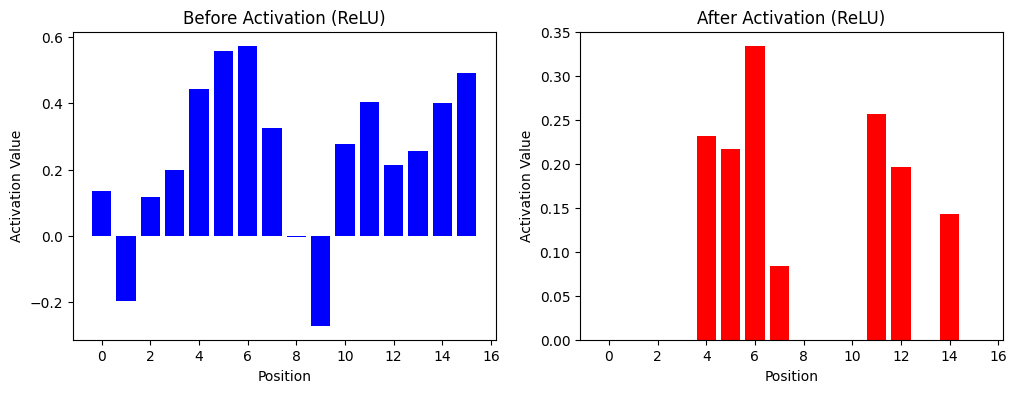

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DNA_CNN(nn.Module):
    def __init__(self):
        super(DNA_CNN, self).__init__()
        # Convolution Layer: 4 input channels (A, C, G, T), 
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=1, kernel_size=5, stride=1, padding=0)

    def forward(self, x):
        x = self.conv1(x)  # Apply convolution
        x = F.relu(x)      # Apply ReLU activation
        return x

np.random.seed(10)
# Instantiate the model
model = DNA_CNN()
print(model)

sequence, label = dataset[0]
out = model(sequence)
print("Output Shape:", out.shape)
print(out)

## plot and compare values in noact_out vs out with bar plot side by side
import matplotlib.pyplot as plt

# Convert to NumPy arrays
noact_out_np = noact_out.squeeze(0).detach().numpy()
out_np = out.squeeze(0).detach().numpy()

# Plot the feature maps
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(len(noact_out_np)), noact_out_np, color='b')
plt.title("Before Activation (ReLU)")
plt.xlabel("Position")
plt.ylabel("Activation Value")
plt.subplot(1, 2, 2)
plt.bar(range(len(out_np)), out_np, color='r')
plt.title("After Activation (ReLU)")
plt.xlabel("Position")
plt.ylabel("Activation Value")
plt.show()


## Pooling layers

- To reduce the spatial dimensions of feature maps. It helps reducing the computational complexity of the network, aggregating features, making the model more robust to small translations or distortions in the input

- Types: 
    - Max Pooling: Keeps the maximum value in a window.
    - Average Pooling: Averages the values in a window.

![](images/pooling2.png)

In [95]:
import torch.nn as nn
import torch.nn.functional as F

class DNA_CNN(nn.Module):
    def __init__(self):
        super(DNA_CNN, self).__init__()
        # Convolution Layer: 4 input channels, 1 filter, kernel size=5
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=1, kernel_size=5, stride=1, padding=0)
        # Pooling Layer: Max Pooling with kernel size=2, stride=2
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv1(x)  # Convolution
        x = F.relu(x)      # ReLU activation
        x = self.pool(x)   # Max Pooling
        return x
    

# Example DNA sequence
sequence, label = dataset[0]  # First sample
sequence = sequence.unsqueeze(0)  # Add batch dimension (1, 4, 20)

# Instantiate the model and pass data through it
model = DNA_CNN()
output = model(sequence)

print("Input Shape:", sequence.shape)  # (1, 4, 20)
print("Output Shape After Convolution:", model.conv1(sequence).shape)  # (1, 1, 16)
print("Output Shape After Pooling:", output.shape)  # (1, 1, 8)



Input Shape: torch.Size([1, 4, 20])
Output Shape After Convolution: torch.Size([1, 1, 16])
Output Shape After Pooling: torch.Size([1, 1, 8])


## Flattening
- Converts the multidimensional output of a convolutional or pooling layer into a 1D vector. 
- This is necessary because the subsequent layers (like fully connected or dense layers) expect inputs to be in a flattened format.




![](images/flat.png)

In [101]:
import torch.nn as nn
import torch.nn.functional as F

class DNA_CNN(nn.Module):
    def __init__(self):
        super(DNA_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=2, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(1 * 16, 1)  # Fully connected layer (adjust input size)

    def forward(self, x):
        x = self.conv1(x)  # Convolution
        x = F.relu(x)      # ReLU activation
        x = self.pool(x)   # Max Pooling
        x = torch.flatten(x, start_dim=1)  # Flatten for fully connected layer
        x = self.fc1(x)    # Fully connected layer
        return x

# Example DNA sequence
sequence, label = dataset[0]  # First sample
sequence = sequence.unsqueeze(0)  # Add batch dimension (1, 4, 20)

# Instantiate the model and pass data through it
model = DNA_CNN()
output = model(sequence)

print("Input Shape:", sequence.shape)  # (1, 4, 20)
print("Shape After Convolution:", model.conv1(sequence).shape)  # (1, 1, 16)
print("Shape After Pooling:", model.pool(model.conv1(sequence)).shape)  # (1, 1, 8)
print("Shape After Flattening:", torch.flatten(model.pool(model.conv1(sequence)), start_dim=1).shape)  # (1, 8)
print("Output Shape (Final):", output.shape)  # (1, 1)


Input Shape: torch.Size([1, 4, 20])
Shape After Convolution: torch.Size([1, 2, 16])
Shape After Pooling: torch.Size([1, 2, 8])
Shape After Flattening: torch.Size([1, 16])
Output Shape (Final): torch.Size([1, 1])


## Fully Connected Layers
   - Perform classification or regression based on the extracted features.
   - Combines all the features detected by earlier layers to predict an output.

## Output Layer
   - Generate the final prediction.
   - Activation Functions:
     - Sigmoid: For binary classification.
     - Softmax: For multi-class classification.


In [ ]:
import torch.nn as nn
import torch.optim as optim

import torch
import torch.nn as nn
import torch.optim as optim

class DNA_CNN(nn.Module):
    def __init__(self):
        super(DNA_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=16, kernel_size=3, stride=1, padding=1) # output length: 20 - 3 + 2*1 + 1 = 20
        self.relu = nn.ReLU() # 
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=160, out_features=64)  
        self.fc2 = nn.Linear(in_features=64, out_features=2)  
        #self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        #x = self.softmax(x)
        return x

model = DNA_CNN()
if torch.cuda.is_available():
    model.cuda()

from torchsummary import summary
summary(model, input_size=(4, 20))  # (Channels, Length)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 16, 20]             208
              ReLU-2               [-1, 16, 20]               0
         MaxPool1d-3               [-1, 16, 10]               0
           Flatten-4                  [-1, 160]               0
            Linear-5                   [-1, 64]          10,304
            Linear-6                    [-1, 2]             130
Total params: 10,642
Trainable params: 10,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.04
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


## Complete code
#### Data

In [137]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Data generation
seq_length = 20
num_sample = 1000

# Motif CCGGAA PWM
motif_pwm = np.array([[10.41, 22.86, 1.92, 1.55, 98.60, 86.66],
                      [68.20, 65.25, 0.50, 0.35, 0.25, 2.57],
                      [17.27, 8.30, 94.77, 97.32, 0.87, 0.00],
                      [4.13, 3.59, 2.81, 0.78, 0.28, 10.77]])
pwm = np.hstack([np.ones((4, 7)), motif_pwm, np.ones((4, 7))])

# Generate positive samples
pos = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_sample,
                                  p=pwm[:, i] / sum(pwm[:, i])) for i in range(seq_length)]).transpose()

# Generate negative samples
neg = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_sample,
                                  p=np.array([1, 1, 1, 1]) / 4) for i in range(seq_length)]).transpose()

# Combine data and create labels
data = np.vstack([pos, neg])
labels = np.array([1] * num_sample + [0] * num_sample)  # Positive: 1, Negative: 0


from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% training, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Labels Shape:", test_labels.shape)


class SequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        """
        Initialize the dataset.
        Args:
        - sequences: A NumPy array of shape (num_samples, seq_length) containing DNA sequences.
        - labels: A NumPy array of shape (num_samples,) containing labels (0 or 1).
        """
        self.sequences = sequences
        self.labels = labels
        self.nucleotide_to_idx = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Convert sequence to one-hot encoding
        sequence = self.sequences[idx]
        one_hot = np.zeros((4, len(sequence)), dtype=np.float32)
        for i, nucleotide in enumerate(sequence):
            one_hot[self.nucleotide_to_idx[nucleotide], i] = 1.0

        # Convert to PyTorch tensor
        one_hot_tensor = torch.tensor(one_hot, dtype=torch.float32)
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.float32)

        return one_hot_tensor, label_tensor

# Create the dataset
train_dataset = SequenceDataset(train_data, train_labels)

# Create the DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)


Training Data Shape: (1600, 20)
Test Data Shape: (400, 20)
Training Labels Shape: (1600,)
Test Labels Shape: (400,)


#### Model and training

In [138]:
import torch
import torch.nn as nn
import torch.optim as optim

class DNA_CNN(nn.Module):
    def __init__(self):
        super(DNA_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=16, kernel_size=3, stride=1, padding=1) # output length: 20 - 3 + 2*1 + 1 = 20
        self.relu = nn.ReLU() # 
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=160, out_features=64)  
        self.fc2 = nn.Linear(in_features=64, out_features=2)  
        #self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        #x = self.softmax(x)
        return x



model = DNA_CNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10  # Number of epochs

for epoch in range(epochs):
    model.train()  # Set model to training mode
    total_loss = 0

    for batch_idx, (sequences, labels) in enumerate(train_dataloader):
        # Prepare data
        sequences = sequences  # (batch_size, 4, seq_length)
        labels = labels.long()  # Convert labels to long for CrossEntropyLoss

        # Forward pass
        outputs = model(sequences)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_dataloader):.4f}")




Epoch 1/10, Loss: 0.4741
Epoch 2/10, Loss: 0.1364
Epoch 3/10, Loss: 0.0889
Epoch 4/10, Loss: 0.0768
Epoch 5/10, Loss: 0.0738
Epoch 6/10, Loss: 0.0616
Epoch 7/10, Loss: 0.0578
Epoch 8/10, Loss: 0.0547
Epoch 9/10, Loss: 0.0528
Epoch 10/10, Loss: 0.0488


#### Testing

In [139]:
# Create test dataset and dataloader
test_dataset = SequenceDataset(test_data, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate the model
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for testing
    for sequences, labels in test_dataloader:
        sequences = sequences  # (batch_size, 4, seq_length)
        labels = labels.long()  # Convert labels to long for CrossEntropyLoss

        # Forward pass
        outputs = model(sequences)

        # Get predictions
        _, predictions = torch.max(outputs, 1)

        # Count correct predictions
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 96.75%


### Device for computation

In [140]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available. Training will be performed on GPU.")
else:
    print("CUDA is not available. Training will be performed on CPU.")

print(next(model.parameters()).device)
print(sequences.device)
print(labels.device)

print(f"Allocated GPU memory: {torch.cuda.memory_allocated() / 1024 ** 2:.2f} MB")
print(f"Cached GPU memory: {torch.cuda.memory_reserved() / 1024 ** 2:.2f} MB")


CUDA is available. Training will be performed on GPU.
cpu
cpu
cpu
Allocated GPU memory: 8.44 MB
Cached GPU memory: 22.00 MB


In [141]:
!nvidia-smi

Mon Dec  2 12:58:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.04             Driver Version: 538.78       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5500 Laptop GPU    On  | 00000000:01:00.0 Off |                  Off |
| N/A   55C    P8              12W /  82W |   1419MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Run on GPU

In [144]:


# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to GPU
model = DNA_CNN().to(device)
import torch.optim as optim

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for batch_idx, (sequences, labels) in enumerate(train_dataloader):
        # Move data to GPU
        sequences = sequences.to(device)  # Move input to GPU
        labels = labels.to(device).long()  # Move labels to GPU and ensure correct type

        # Forward pass
        outputs = model(sequences)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_dataloader):.4f}")


Using device: cuda
Epoch 1/5, Loss: 0.4898
Epoch 2/5, Loss: 0.1334
Epoch 3/5, Loss: 0.0785
Epoch 4/5, Loss: 0.0703
Epoch 5/5, Loss: 0.0630


In [146]:
# Test the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for sequences, labels in test_dataloader:
        # Move data to GPU
        sequences = sequences.to(device)
        labels = labels.to(device).long()

        # Forward pass
        outputs = model(sequences)

        # Get predictions
        _, predictions = torch.max(outputs, 1)

        # Count correct predictions
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 96.50%


In [147]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available. Training will be performed on GPU.")
else:
    print("CUDA is not available. Training will be performed on CPU.")

print(next(model.parameters()).device)
print(sequences.device)
print(labels.device)

print(f"Allocated GPU memory: {torch.cuda.memory_allocated() / 1024 ** 2:.2f} MB")
print(f"Cached GPU memory: {torch.cuda.memory_reserved() / 1024 ** 2:.2f} MB")


CUDA is available. Training will be performed on GPU.
cuda:0
cuda:0
cuda:0
Allocated GPU memory: 16.74 MB
Cached GPU memory: 22.00 MB
